In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\sssss\Aug-2024 Instacart Basket Analysis'

In [3]:
df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
df = df_ords_prods_cust_merge

In [5]:
column_names = df.columns.tolist()

In [6]:
column_names

['Unnamed: 0.1',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'Unnamed: 0',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'source',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income']

## Bar Chart

<Axes: xlabel='order_dow'>

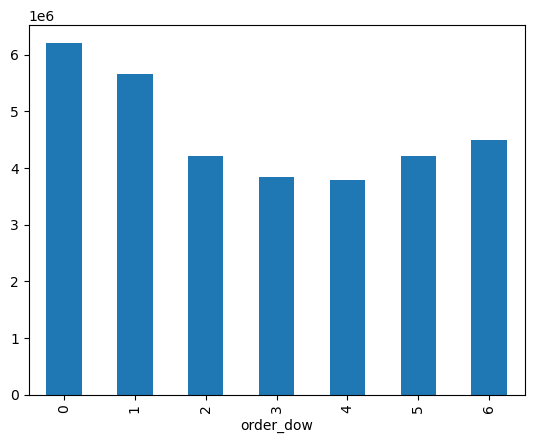

In [8]:
df_ords_prods_cust_merge['order_dow'].value_counts().sort_index().plot.bar()

## Histogram

In [10]:
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['prices'] >100, 'prices'] = np.nan

In [11]:
df_ords_prods_cust_merge['prices'].max()

25.0

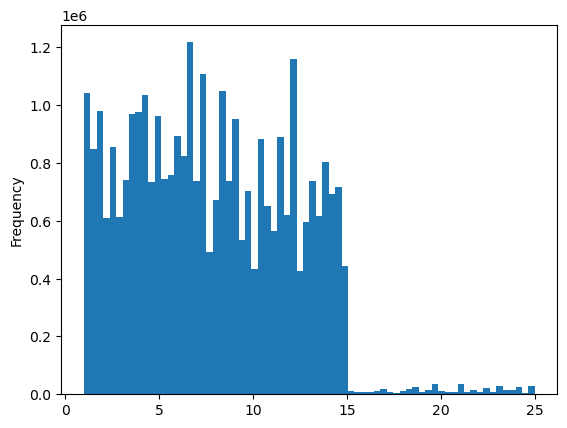

In [12]:
hist_2 = df_ords_prods_cust_merge['prices'].plot.hist(bins = 70)

## Scatterplot

In [14]:
#Creating a list holding true/False values to the test np.random.rant() <= 0.7

In [15]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust_merge)) <= 0.7

In [22]:
#Creating Sample
big = df_ords_prods_cust_merge[dev]

### Using Samples

In [23]:
small = df_ords_prods_cust_merge[~dev]

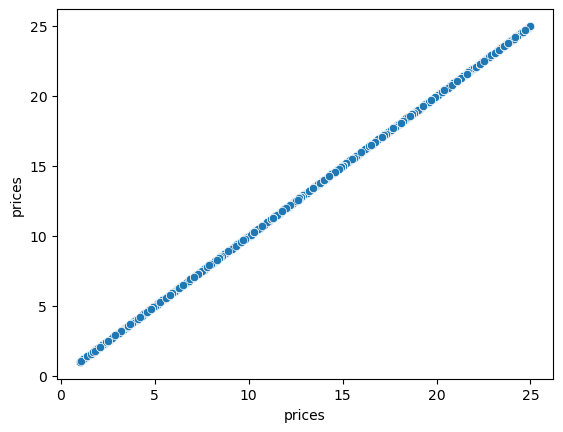

In [38]:
Scatterplot1 = sns.scatterplot(x = 'prices', y = 'prices',data = small)

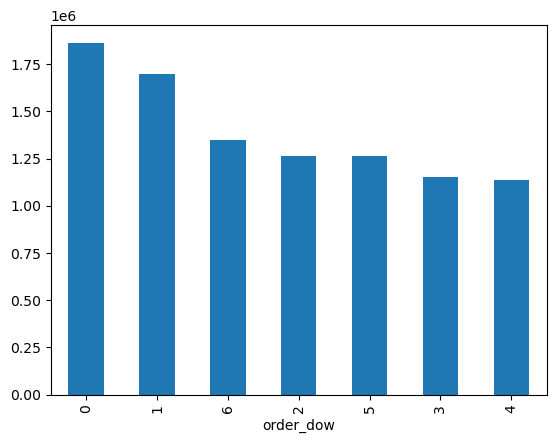

In [32]:
Linechart1 = small['order_dow'].value_counts().plot.bar()

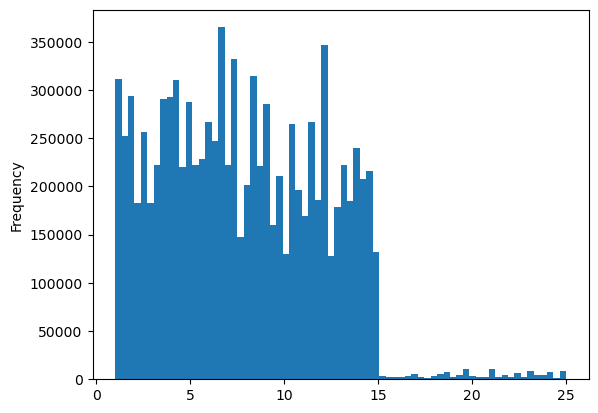

In [31]:
hist_3 = small['prices'].plot.hist(bins = 70)

## Create a histogram of the “order_hour_of_day” column.

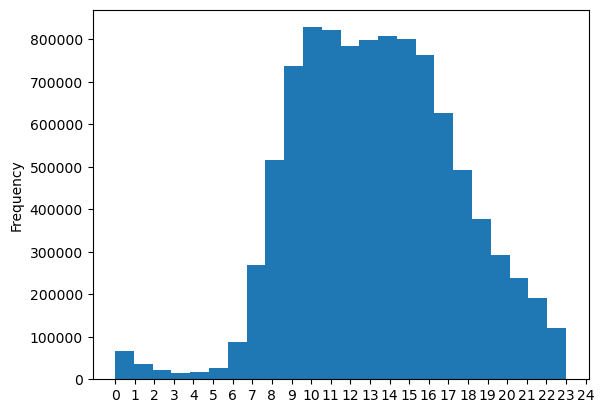

In [45]:
hist_4 = small['order_hour_of_day'].plot.hist(bins = 24, xticks=range(25))

#### Histogram states that the max purchases are occuring between 10-11am and 15-16pm hours. A peak is reached at 10-11am.

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [54]:
#new column 'max_order'
df_ords_prods_cust_merge['max_order'] = df_ords_prods_cust_merge.groupby(['user_id'])['order_number'].transform('max')

In [58]:
#Recreating loyalty flags
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['max_order'] <= 40) & (df_ords_prods_cust_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

<Axes: xlabel='loyalty_flag'>

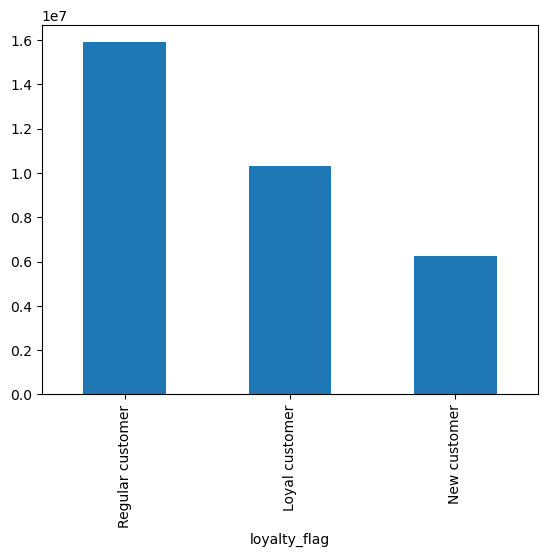

In [65]:
df_ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

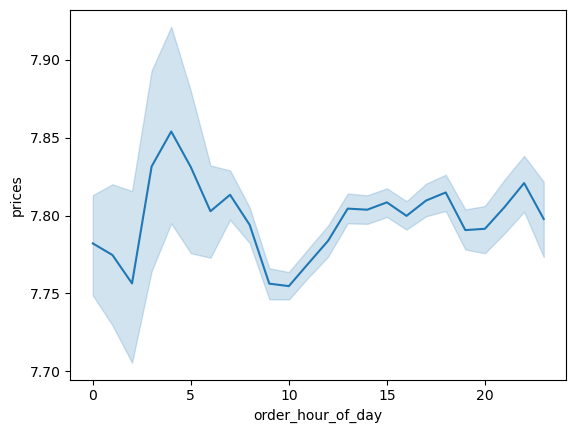

In [77]:
line_price_hod = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices')

### Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

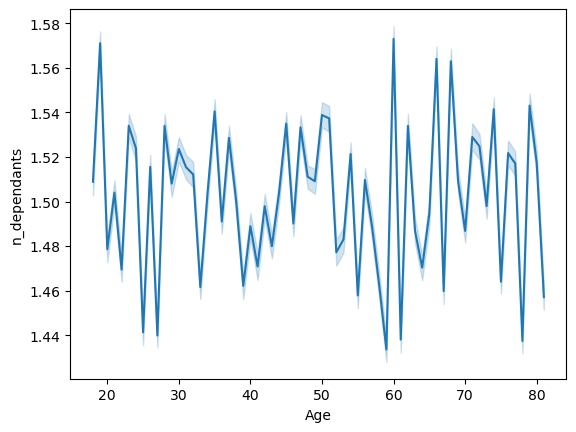

In [85]:
line_age_nod = sns.lineplot(data = small, x = 'Age', y = 'n_dependants')

### There is no clear correlation between 'Age' and 'Dependents'

### You’ll also need to explore whether there’s a connection between age and spending power (income).

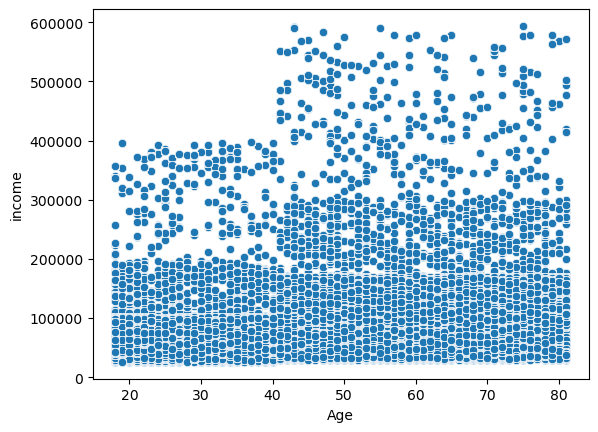

In [91]:
Scatterplot1 = sns.scatterplot(x = 'Age', y = 'income',data = small)

### After the age of 40 the income increases gradually

# not exporting images as having memory issues with laptop
